
# **PRACTICA MACHINE LEARNING YURI MORENO**


In [754]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

# Seteamos opciones de pandas sobre las columnas y ver los números sin notación cientifica 
pd.options.display.max_columns = None
#pd.set_option('display.float_format', '{:.1f}'.format)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
 
import warnings
warnings.filterwarnings('ignore')

# cargamos el csv y vemos su composición a groso modo


In [755]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

full_df

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

Vemos numero de total de observaciones y características y vemos que tenemos información suficiente para continuar con nuestro análisis exploratorio

In [756]:
print(f'El numero de muestras es {full_df.shape[0]} y la dimensionalidad de entrada es {full_df.shape[1]}')

El numero de muestras es 14780 y la dimensionalidad de entrada es 89


In [757]:
full_df.iloc[:,56]

0         58.0
1         70.0
2         70.0
3        229.0
4        149.0
         ...  
14775     90.0
14776     75.0
14777    100.0
14778     99.0
14779     74.0
Name: Price, Length: 14780, dtype: float64

visualizamos : el total de las observaciones,  el total de observaiones que tiene cada una de nuestras columnas al igual que el tipo de dato que contiene. Con esta visualización también podemos ver los valores nulos por la cantidad que le haga falta a cada columna para llegar al total de observaciones.

In [758]:
full_df.info(verbose=True,null_counts=True) +fo(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

NameError: name 'fo' is not defined

A manera de confirmación verificamos  la totalidad de los valores nulos de cada variable, no obstante a pesar que incluí la opción para que se pueda ver todos, no se muestra la totalidad. :(

In [759]:
pd.options.display.max_columns = None
print(full_df.isnull().sum())

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 1
                                  ... 
Cancellation Policy                  0
Calculated host listings count       4
Reviews per Month                 3162
Geolocation                          0
Features                             1
Length: 89, dtype: int64


In [760]:
round(full_df.isnull().mean()*100,2).sort_values(ascending=False)

Has Availability        99.92
Host Acceptance Rate    99.74
Jurisdiction Names      98.46
License                 97.64
Square Feet             95.95
                        ...  
Minimum Nights           0.00
Extra People             0.00
Guests Included          0.00
Room Type                0.00
ID                       0.00
Length: 89, dtype: float64

En el siguiente apartado, eliminarémos: 
a. Las columnas que tienen más de un 90% de missing Data.
b. Varialbles categorícas que por desconocimiento o imposibilidad no puedan ser transformadas a números.
c. variables que ya esten contenidas en otras como por elemplo Country Code, City, Market, State entre otros.

In [761]:
full_df = full_df.drop(['ID','Host Since','Latitude','Longitude','Zipcode','City','Country Code','Geolocation','Last Scraped','Host Listings Count','Review Scores Communication', 'Calendar last Scraped','Neighborhood Overview','Review Scores Checkin','Notes','Name','Summary','Calendar Updated','Listing Url','Space','Transit', 'Experiences Offered','Scrape ID','Access', 'Interaction', 'House Rules','Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host URL','Host Name','Host Location','Host About','Host Response Time','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url','Reviews per Month','Reviews per Month','Jurisdiction Names','License','Review Scores Rating','Last Review','First Review','Has Availability','Cleaning Fee','Security Deposit','Market','State','Calendar Updated','Description','Host Verifications','Street','Square Feet','Monthly Price','Weekly Price','Country','Neighbourhood','Host Neighbourhood','Amenities', 'Features'], axis=1)


In [762]:
full_df

,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,58386783,100.0,1.0,78733,NaN,"Austin, TX",Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,58.0,1,0,2,1125,10,34,64,281,42,10.0,10.0,10.0,10.0,moderate,1.0
1,102947901,100.0,162.0,la Dreta de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,44,1,1125,6,21,39,309,1,8.0,10.0,8.0,10.0,super_strict_30,106.0
2,102947901,100.0,162.0,la Dreta de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,42,1,1125,7,21,42,291,0,NaN,NaN,NaN,NaN,super_strict_30,106.0
3,131794,100.0,27.0,la Dreta de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,229.0,2,39,2,1125,11,24,47,316,13,10.0,9.0,10.0,9.0,strict,24.0
4,54310958,99.0,207.0,l'Antiga Esquerra de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,149.0,1,0,2,1125,0,0,0,7,0,NaN,NaN,NaN,NaN,flexible,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,10700163,100.0,1.0,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,90.0,1,0,1,1125,7,34,64,339,30,10.0,10.0,9.0,10.0,strict,1.0
14776,122351810,NaN,1.0,Vaugirard,NaN,"Paris, France",Bed & Breakfast,Private room,1,1.0,1.0,2.0,Real Bed,75.0,1,0,3,7,17,47,77,78,0,NaN,NaN,NaN,NaN,flexible,1.0
14777,9844427,100.0,1.0,Batignolles-Monceau,NaN,"Paris, France",Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,100.0,3,10,3,1125,7,18,29,97,17,10.0,10.0,10.0,10.0,strict,1.0
14778,5552771,100.0,1.0,City Park West,NaN,"Denver, CO",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,99.0,2,10,2,7,0,0,0,14,1,10.0,10.0,10.0,10.0,moderate,1.0


In [763]:
full_df= full_df.reindex(columns=['Price','Host ID','Host Response Rate','Host Total Listings Count','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Smart Location','Property Type','Room Type','Accommodates','Bathrooms','Bedrooms','Beds','Bed Type','Guests Included','Extra People','Minimum Nights','Maximum Nights','Availability 30','Availability 60','Availability 90','Availability 365','Number of Reviews','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Location','Review Scores Value','Cancellation Policy','Calculated host listings count'])

In [764]:
full_df

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,58.0,58386783,100.0,1.0,78733,NaN,"Austin, TX",Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,1125,10,34,64,281,42,10.0,10.0,10.0,10.0,moderate,1.0
1,70.0,102947901,100.0,162.0,la Dreta de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,44,1,1125,6,21,39,309,1,8.0,10.0,8.0,10.0,super_strict_30,106.0
2,70.0,102947901,100.0,162.0,la Dreta de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,42,1,1125,7,21,42,291,0,NaN,NaN,NaN,NaN,super_strict_30,106.0
3,229.0,131794,100.0,27.0,la Dreta de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,2,39,2,1125,11,24,47,316,13,10.0,9.0,10.0,9.0,strict,24.0
4,149.0,54310958,99.0,207.0,l'Antiga Esquerra de l'Eixample,Eixample,"Barcelona, Spain",Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,1,0,2,1125,0,0,0,7,0,NaN,NaN,NaN,NaN,flexible,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,90.0,10700163,100.0,1.0,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,1,0,1,1125,7,34,64,339,30,10.0,10.0,9.0,10.0,strict,1.0
14776,75.0,122351810,NaN,1.0,Vaugirard,NaN,"Paris, France",Bed & Breakfast,Private room,1,1.0,1.0,2.0,Real Bed,1,0,3,7,17,47,77,78,0,NaN,NaN,NaN,NaN,flexible,1.0
14777,100.0,9844427,100.0,1.0,Batignolles-Monceau,NaN,"Paris, France",Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,3,10,3,1125,7,18,29,97,17,10.0,10.0,10.0,10.0,strict,1.0
14778,99.0,5552771,100.0,1.0,City Park West,NaN,"Denver, CO",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,10,2,7,0,0,0,14,1,10.0,10.0,10.0,10.0,moderate,1.0


In [765]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,14763.0,7.356147e+01,7.206205e+01,9.0,34.00,55.0,86.00,999.0
Host ID,14780.0,3.608080e+07,3.425360e+07,17453.0,6787360.25,24648753.5,54329188.25,124753355.0
Host Response Rate,12881.0,9.482346e+01,1.521599e+01,0.0,100.00,100.0,100.00,100.0
Host Total Listings Count,14777.0,1.251364e+01,3.409022e+01,0.0,1.00,2.0,6.00,519.0
Accommodates,14780.0,3.277808e+00,2.097291e+00,1.0,2.00,3.0,4.00,16.0
Bathrooms,14725.0,1.281732e+00,6.585171e-01,0.0,1.00,1.0,1.00,8.0
Bedrooms,14755.0,1.343816e+00,9.000784e-01,0.0,1.00,1.0,2.00,10.0
Beds,14731.0,2.044260e+00,1.612770e+00,1.0,1.00,2.0,2.00,16.0
Guests Included,14780.0,1.589986e+00,1.182550e+00,0.0,1.00,1.0,2.00,16.0
Extra People,14780.0,7.690460e+00,1.297135e+01,0.0,0.00,0.0,15.00,500.0


In [766]:
print(f'El numero de muestras es {full_df.shape[0]} y la dimensionalidad de entrada es {full_df.shape[1]}')

El numero de muestras es 14780 y la dimensionalidad de entrada es 29


# Exploración de los datos

Con el describe() podemos ver los posibles outliers como el de los baños que son ocho, pienso que el máximo de noches tiene un valor muy alejado de la cantidad normal

Veamos que información representa las variables tipo objeto

In [767]:
full_df.describe(include='O').T

,count,unique,top,freq
Neighbourhood Cleansed,14780,478,Embajadores,1849
Neighbourhood Group Cleansed,13760,49,Centro,6780
Smart Location,14780,257,"Madrid, Spain",13194
Property Type,14780,22,Apartment,11962
Room Type,14780,3,Entire home/apt,8976
Bed Type,14780,5,Real Bed,14456
Cancellation Policy,14780,8,strict,5742


# VARIABLE RESPUESTA 
#  sns.boxplot(x="Bedrooms", data=full_df)PRECIO 
del precio podemos decir que no sigue una distribución gausena, por lo que posiblente para mejorar los resultados debemos aplicarle un logaritmo.


<AxesSubplot:xlabel='Price'>

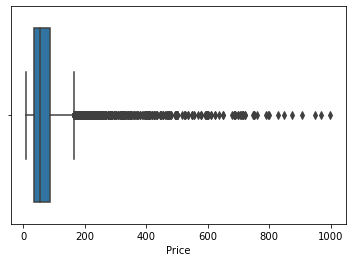

In [768]:
sns.boxplot(x="Price", data=full_df)

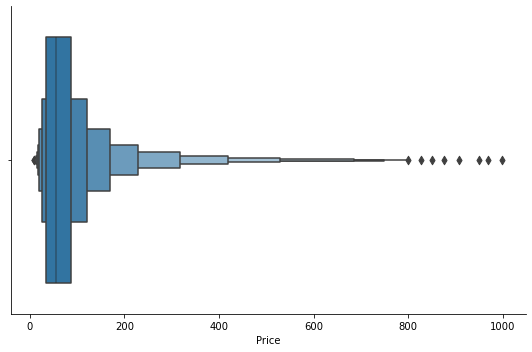

In [769]:
sns.catplot(x = "Price", data = full_df, kind = "boxen", aspect = 1.5);

Text(0.5, 0, 'Price')

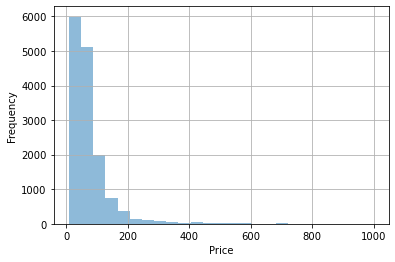

In [770]:
full_df ['Price'].plot.hist(alpha=0.5, bins=25, grid=True)

plt.xlabel('Price')

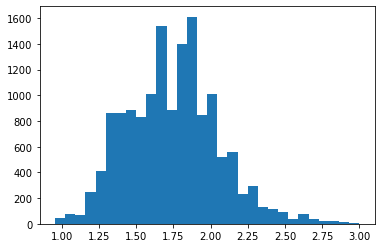

In [771]:
plt.hist(np.log10(full_df['Price']), bins=30)
plt.show()

Parece ser que con log10 tiene una represetanción mas gauseana, de tener tiempo harémos dos modelos, uno aplicando un log 10 y el otro eliminando los outliers

# ANÁLISIS VARIABLES NÚMERICAS

In [772]:
full_df["Bathrooms"].value_counts()

1.0    11088
2.0     2276
1.5      552
3.0      321
2.5      117
4.0       71
0.5       70
0.0       66
5.0       62
6.0       30
4.5       28
3.5       24
5.5        8
8.0        4
7.0        4
6.5        3
7.5        1
Name: Bathrooms, dtype: int64

Text(0.5, 0, 'Bathrooms')

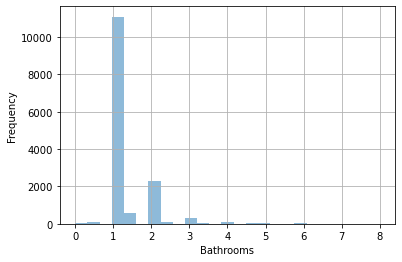

In [773]:
full_df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True)

plt.xlabel('Bathrooms')

<AxesSubplot:xlabel='Bathrooms', ylabel='Density'>

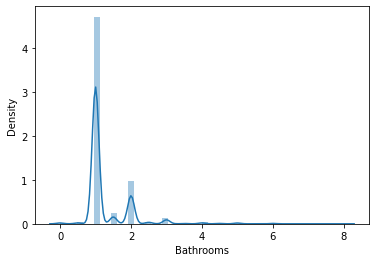

In [774]:
sns.distplot(full_df['Bathrooms'])

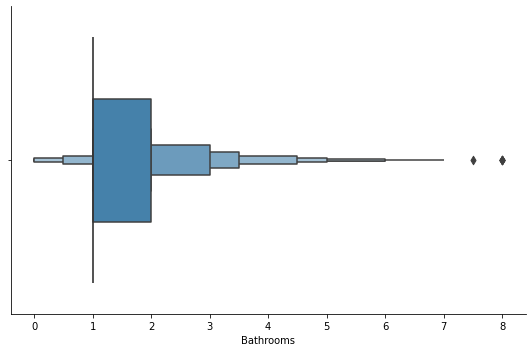

In [775]:
sns.catplot(x = "Bathrooms", data = full_df, kind = "boxen", aspect = 1.5);

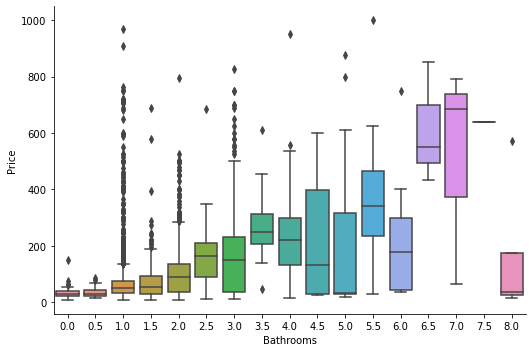

In [776]:
sns.catplot(x ="Bathrooms", y="Price", data = full_df, kind = "box", aspect = 1.5);

El numero de baños en relación con el precio sigue una distribución asimétrica, en siete baños existe un sesgo negativo y a partir de 2.5 hay mayor variabilidad por tanto no es tan confiabla , por estos resultados siento que quiza los baños no serán una buena característica para determinar el precio, ya lo veremos al final.
**filtro en 5 baños**

In [777]:

full_df["Bedrooms"].value_counts()

1.0     9765
2.0     2617
0.0     1002
3.0      926
4.0      298
5.0       83
6.0       35
7.0       12
8.0       10
10.0       7
Name: Bedrooms, dtype: int64

<AxesSubplot:xlabel='Bedrooms'>

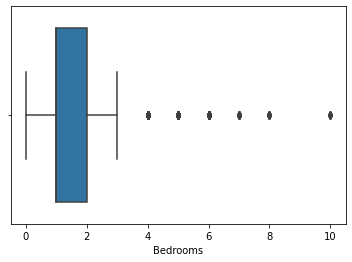

In [778]:
sns.boxplot(x="Bedrooms", data=full_df)

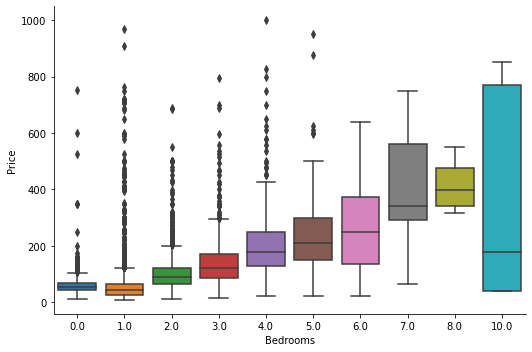

In [779]:
sns.catplot(x ="Bedrooms", y="Price", data = full_df, kind = "box", aspect = 1.5);

AxesSubplot(0.125,0.125;0.775x0.755)


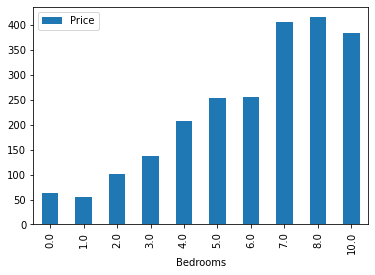

In [780]:
axis =pd.DataFrame(full_df.groupby('Bedrooms')["Price"].mean()).plot.bar()
print(axis)
plt.show()

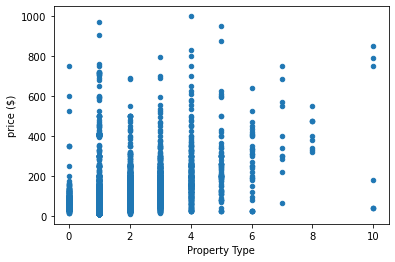

In [781]:
full_df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Property Type')
plt.ylabel('price ($)')
plt.show()

Podemos observar que el precio está relacionado positivamente con la cantidad de habitaciones, lo que quiere decir que a más habitaciones mayor será el precio, vemos unos valores anomalos a partir de 3 habitaciones, no obstante, en principio  harémos un **filro en 6**, a partir de 6 baños son hay mañor variabilidad en los datos y mayor disperción y esto también se corresponde con la información del valueCounts. 

In [782]:
full_df["Host Response Rate"].value_counts()

100.0    9670
90.0      340
96.0      297
99.0      260
75.0      227
         ... 
54.0        1
14.0        1
62.0        1
41.0        1
24.0        1
Name: Host Response Rate, Length: 70, dtype: int64

<AxesSubplot:xlabel='Host Response Rate'>

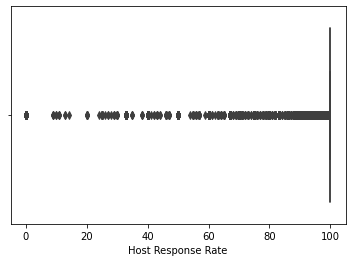

In [783]:
sns.boxplot(x="Host Response Rate", data=full_df)

<AxesSubplot:xlabel='Host Response Rate', ylabel='Density'>

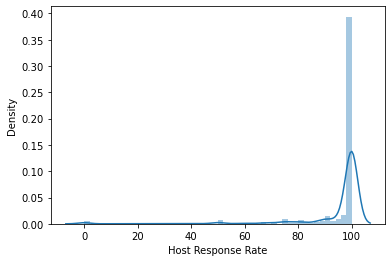

In [784]:
sns.distplot(full_df['Host Response Rate'])

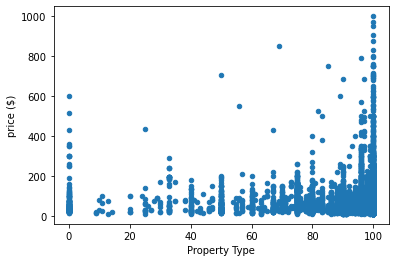

In [785]:
full_df.plot(kind = 'scatter',x='Host Response Rate',y = 'Price', cmap='coolwarm')
plt.xlabel('Property Type')
plt.ylabel('price ($)')

np.pi * (15 * np.random.rand())**2
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


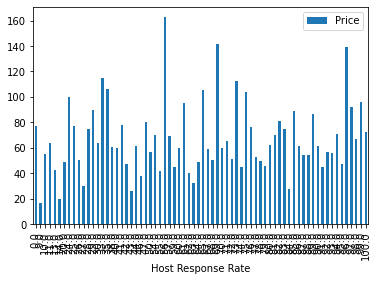

In [786]:
axis =pd.DataFrame(full_df.groupby('Host Response Rate')["Price"].mean()).plot.bar()
print(axis)
plt.show()

<AxesSubplot:xlabel='Calculated host listings count', ylabel='Density'>

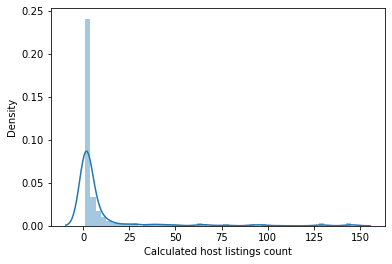

In [787]:
sns.distplot(full_df['Calculated host listings count'])

In [788]:
full_df["Host Total Listings Count"].value_counts()

1.0      6353
2.0      2297
3.0      1212
4.0       752
5.0       424
6.0       348
8.0       252
10.0      239
9.0       226
7.0       193
11.0      160
207.0     159
164.0     145
15.0      135
147.0     129
12.0      102
68.0      102
14.0      101
114.0      97
16.0       94
46.0       92
13.0       90
40.0       77
142.0      77
38.0       76
74.0       64
17.0       61
32.0       59
20.0       52
26.0       52
51.0       51
57.0       48
39.0       47
24.0       47
18.0       43
21.0       40
34.0       33
27.0       32
25.0       29
30.0       29
28.0       28
36.0       26
23.0       24
0.0        19
162.0      17
22.0       13
45.0       11
136.0       5
31.0        4
35.0        4
84.0        2
63.0        1
519.0       1
265.0       1
81.0        1
50.0        1
Name: Host Total Listings Count, dtype: int64

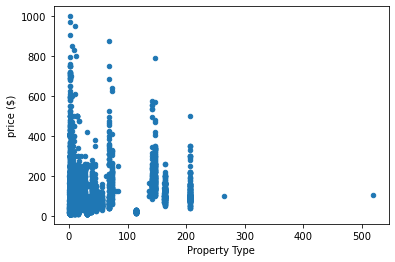

In [789]:
full_df.plot(kind = 'scatter',x='Host Total Listings Count',y = 'Price')
plt.xlabel('Property Type')
plt.ylabel('price ($)')
plt.show()

<AxesSubplot:xlabel='Host Total Listings Count', ylabel='Density'>

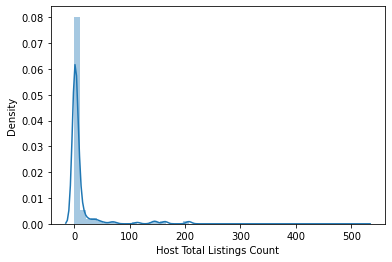

In [790]:
sns.distplot(full_df['Host Total Listings Count'])

<AxesSubplot:xlabel='Calculated host listings count'>

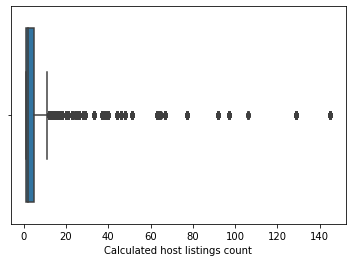

In [791]:
sns.boxplot(x="Calculated host listings count", data=full_df)

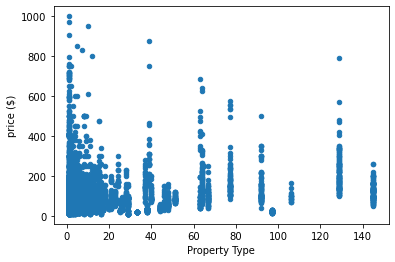

In [792]:
full_df.plot(kind = 'scatter',x='Calculated host listings count',y = 'Price')
plt.xlabel('Property Type')
plt.ylabel('price ($)')
plt.show()

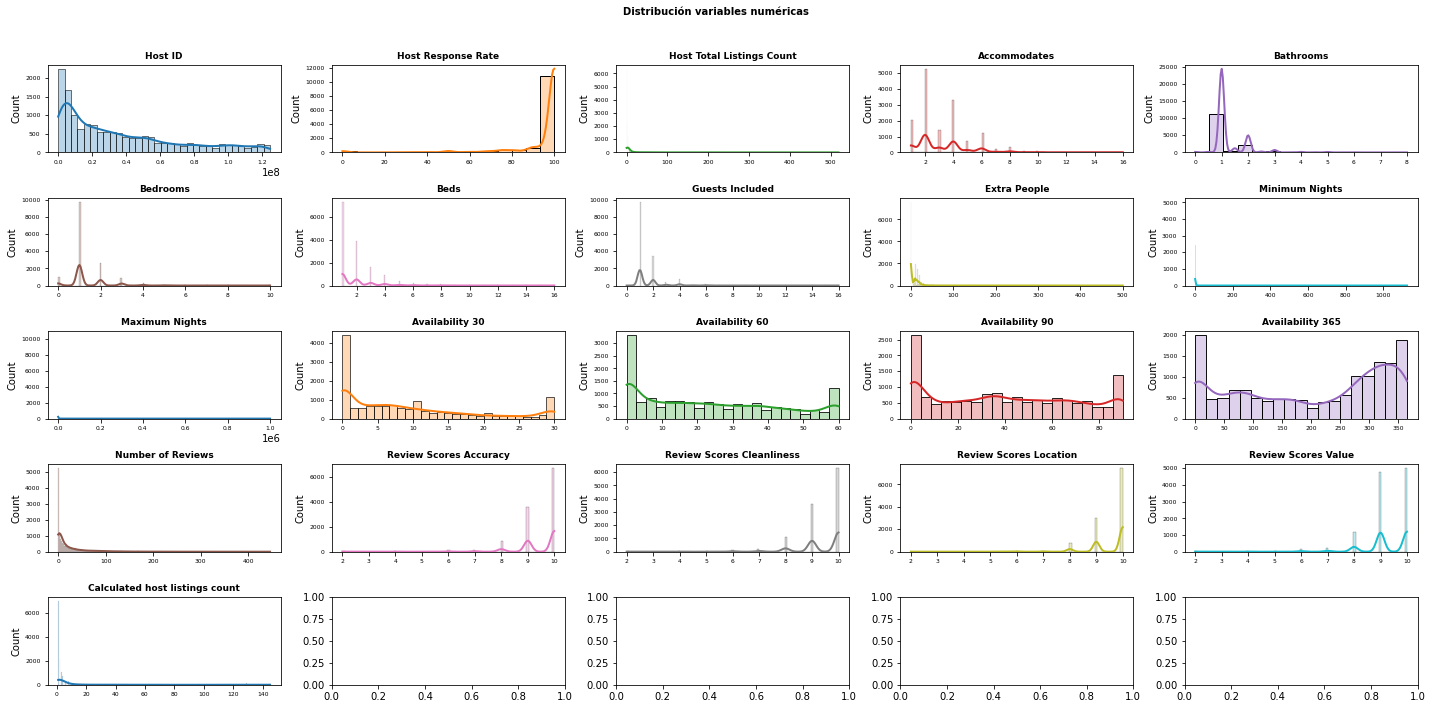

In [793]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 10))
axes = axes.flat
columnas_numeric = full_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = full_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

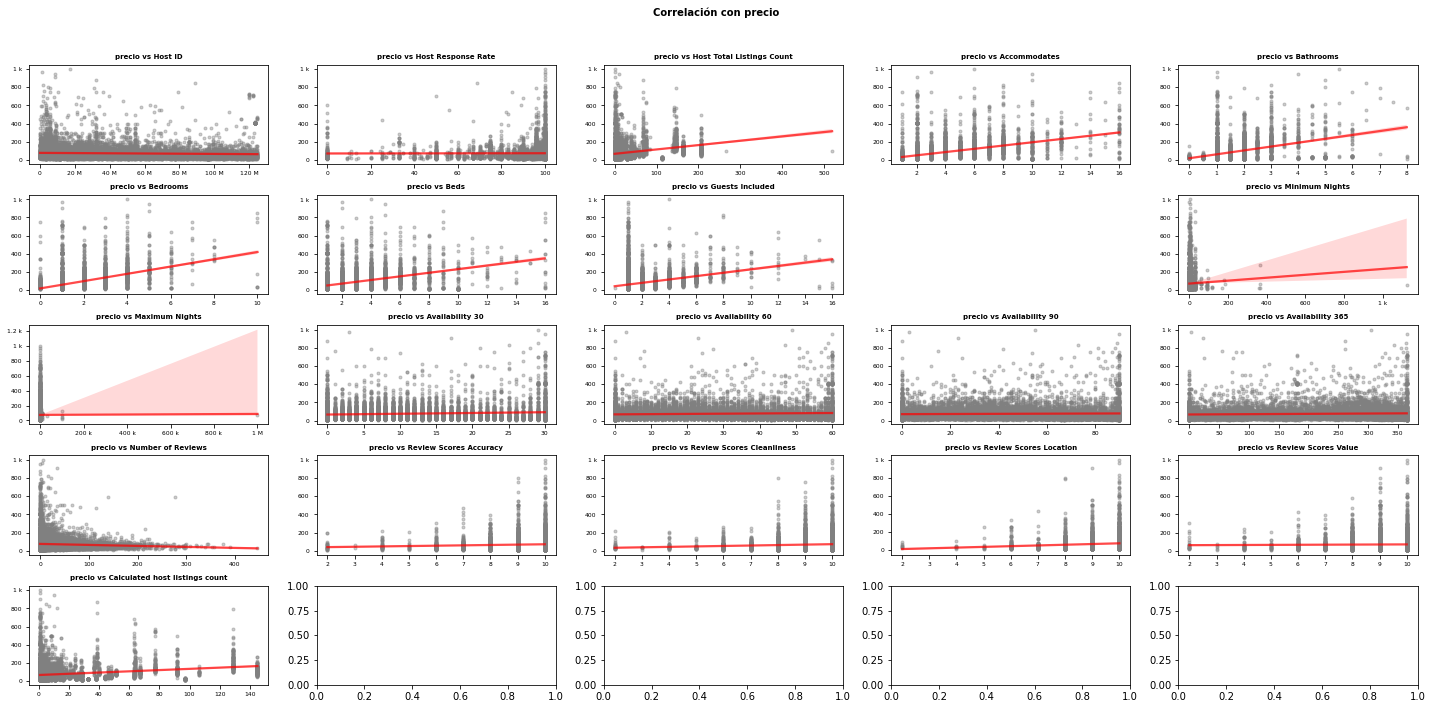

In [794]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 10))
axes = axes.flat
columnas_numeric = full_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = full_df[colum],
        y           = full_df['Price'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

In [795]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = full_df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)



,variable_1,variable_2,r,abs_r
321,Availability 90,Availability 60,0.963501,0.963501
300,Availability 60,Availability 90,0.963501,0.963501
87,Host Total Listings Count,Calculated host listings count,0.922838,0.922838
465,Calculated host listings count,Host Total Listings Count,0.922838,0.922838
277,Availability 30,Availability 60,0.921476,0.921476
298,Availability 60,Availability 30,0.921476,0.921476
278,Availability 30,Availability 90,0.849756,0.849756
320,Availability 90,Availability 30,0.849756,0.849756
95,Accommodates,Beds,0.838797,0.838797
158,Beds,Accommodates,0.838797,0.838797


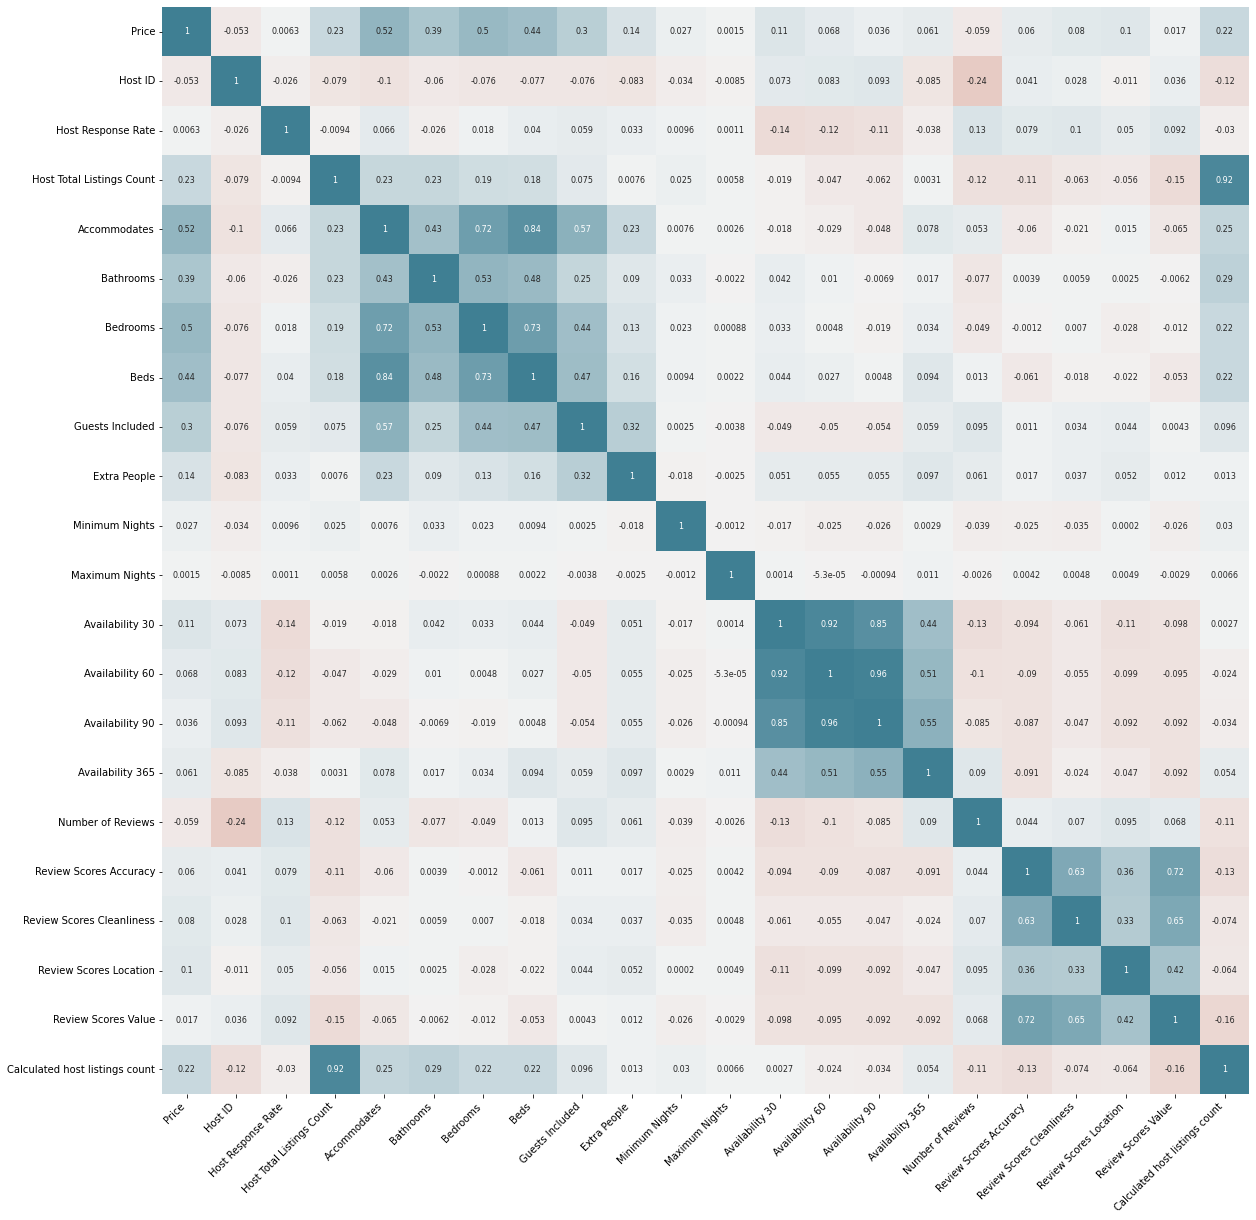

In [796]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Conclusiones de las variables numericas analizadas

1. Al precio debemos hacerle una transformacón para que tenga una distribución gauseana y facilitar así mejores resultados
2. haremos un filtro hasta 5 en los baños
3. En las hábitaciones se ve claro que 10 es un outlier, y según las gráficas analizadas se establecerá un filtro hasta 6 y de pendiendo de los resultados podriamos reducir a 4
4. Host Response Rate tiene unos datos muy desbalanceados que pueden afectar los resultados, no obstante parece no tener mayor correlación con el precio .
5. variables más correlacionadas son: calculated host listings count y host total listings count. 
6. Bedrooms y beds tienen una alta correlacion con acommodates
7. Las características Availability 30,60,90 tienen alta correlación
8. review Scores Accurancy tiene una alta correlación con Review Scores Value
9. review scores communication tiene una gran relación con review scores checkin
10 Las características más correlacionadas con el precio son : Total Listings Count, Accomodates, Bathroom, Bedroom, guess included, extra people, 

# ANÁLISIS VARIABLES OBJETO

In [797]:
full_df.describe(include='O').T

,count,unique,top,freq
Neighbourhood Cleansed,14780,478,Embajadores,1849
Neighbourhood Group Cleansed,13760,49,Centro,6780
Smart Location,14780,257,"Madrid, Spain",13194
Property Type,14780,22,Apartment,11962
Room Type,14780,3,Entire home/apt,8976
Bed Type,14780,5,Real Bed,14456
Cancellation Policy,14780,8,strict,5742


In [798]:
full_df["Bed Type"].value_counts()

Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: Bed Type, dtype: int64

<AxesSubplot:xlabel='Bed Type', ylabel='count'>

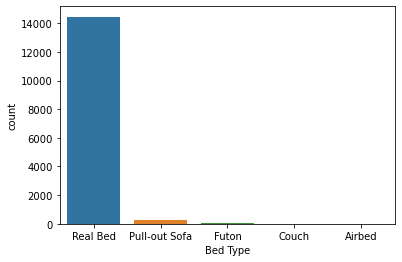

In [799]:
sns.countplot(x='Bed Type', data=full_df)

In [800]:
full_df["Cancellation Policy"].value_counts()

strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

<AxesSubplot:xlabel='Cancellation Policy', ylabel='count'>

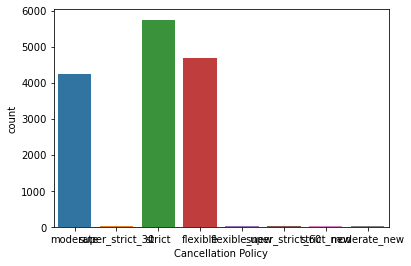

In [801]:
sns.countplot(x='Cancellation Policy', data=full_df)

In [802]:
full_df["Neighbourhood Group Cleansed"].value_counts()

Centro                      6780
Chamberí                     960
Salamanca                    883
Arganzuela                   793
Tetuán                       464
Moncloa - Aravaca            450
Retiro                       439
Latina                       379
Chamartín                    361
Carabanchel                  358
Ciudad Lineal                309
Puente de Vallecas           222
Hortaleza                    186
Fuencarral - El Pardo        170
Usera                        145
Eixample                     124
San Blas - Canillejas        118
Villaverde                    83
Barajas                       81
Moratalaz                     74
Villa de Vallecas             46
Gràcia                        41
Ciutat Vella                  41
Sants-Montjuïc                39
Manhattan                     35
Vicálvaro                     34
Brooklyn                      28
Les Corts                     15
Sant Martí                    14
Sarrià-Sant Gervasi           13
Isole     

In [803]:
full_df["Neighbourhood Cleansed"].value_counts() 

Embajadores               1849
Universidad               1363
Palacio                   1084
Sol                        942
Justicia                   789
                          ... 
Alt  Treptow                 1
Whring                      1
Dbling                      1
Frankfurter Allee Nord       1
Ravenna                      1
Name: Neighbourhood Cleansed, Length: 478, dtype: int64

In [804]:
full_df["Property Type"].value_counts() 

Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: Property Type, dtype: int64

In [805]:
100 * full_df['Property Type'].value_counts() / len(full_df['Property Type'])

Apartment             80.933694
House                  9.255751
Condominium            2.456022
Bed & Breakfast        2.388363
Loft                   2.063599
Other                  1.522327
Dorm                   0.297700
Guesthouse             0.284168
Chalet                 0.175913
Villa                  0.128552
Townhouse              0.115020
Hostel                 0.108254
Serviced apartment     0.087957
Boutique hotel         0.040595
Boat                   0.027064
Camper/RV              0.027064
Guest suite            0.020298
Casa particular        0.020298
Earth House            0.020298
Bungalow               0.013532
Tent                   0.006766
Timeshare              0.006766
Name: Property Type, dtype: float64

<AxesSubplot:xlabel='Property Type', ylabel='count'>

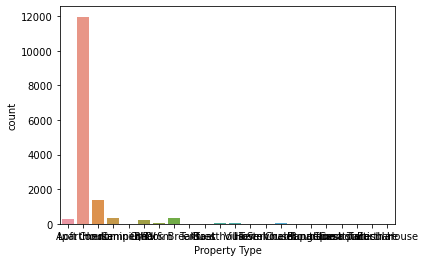

In [806]:
sns.countplot(x='Property Type', data=full_df)

In [807]:
**Datos debalanceados, para balancearlos si no tenemos buenos resultados lo que haremos será establecer un corte en House 

SyntaxError: invalid syntax (1463415963.py, line 1)

In [808]:
full_df["Smart Location"].value_counts() 

Madrid, Spain                     13194
Barcelona, Spain                    290
London, United Kingdom              129
Paris, France                       108
马德里, Spain                           52
                                  ...  
Caimari, Spain                        1
Sint-Gillis, Belgium                  1
Mile End / Bow, United Kingdom        1
Porto Cristo, Spain                   1
Son Vida, Spain                       1
Name: Smart Location, Length: 257, dtype: int64

In [809]:
100 * full_df['Smart Location'].value_counts() / len(full_df['Smart Location'])

Madrid, Spain                     89.269283
Barcelona, Spain                   1.962111
London, United Kingdom             0.872801
Paris, France                      0.730717
马德里, Spain                         0.351827
                                    ...    
Caimari, Spain                     0.006766
Sint-Gillis, Belgium               0.006766
Mile End / Bow, United Kingdom     0.006766
Porto Cristo, Spain                0.006766
Son Vida, Spain                    0.006766
Name: Smart Location, Length: 257, dtype: float64

**el 89 % de los datos está en Madrid España, y el 2 en Barcelona un dato muy desbalanceado. Decidimos quedarnos con el area de Madrid 

In [810]:
pd.DataFrame(full_df.groupby('Property Type')["Price"].mean().sort_values(ascending=False))


,Price
Property Type,
Villa,309.000000
Boat,101.500000
Townhouse,100.588235
House,97.520147
Chalet,87.920000
Loft,78.491803
Apartment,72.081995
Boutique hotel,65.833333
Other,64.662222


In [811]:
pd.DataFrame(full_df.groupby('Neighbourhood Group Cleansed')["Price"].mean().sort_values(ascending=False))


,Price
Neighbourhood Group Cleansed,
Ballard,218.000000
Sarrià-Sant Gervasi,161.769231
Eixample,136.580645
Manhattan,126.342857
Capitol Hill,114.000000
Isole,113.769231
Ciutat Vella,113.024390
Other neighborhoods,106.000000
Horta-Guinardó,101.250000


AxesSubplot(0.125,0.125;0.775x0.755)


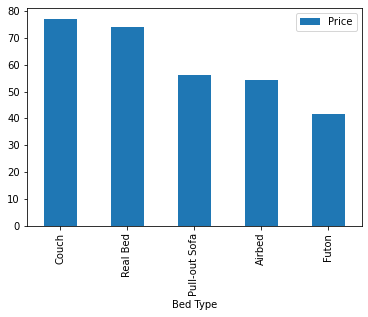

In [812]:
axis =pd.DataFrame(full_df.groupby('Bed Type')["Price"].mean().sort_values(ascending=False)).plot.bar()
print(axis)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


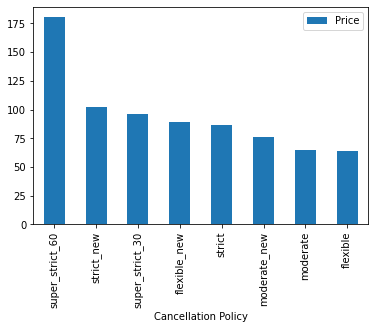

In [813]:

axis = pd.DataFrame(full_df.groupby('Cancellation Policy')["Price"].mean().sort_values(ascending=False)).plot.bar()
print(axis)
plt.show()

<AxesSubplot:title={'center':'Price'}, xlabel='Cancellation Policy'>

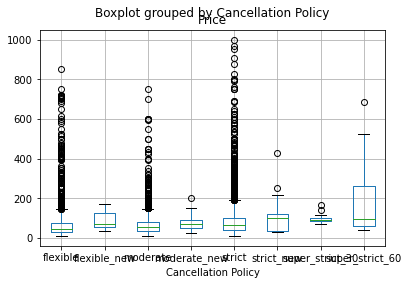

In [814]:

full_df.boxplot(by='Cancellation Policy', column='Price')

<AxesSubplot:xlabel='Property Type', ylabel='count'>

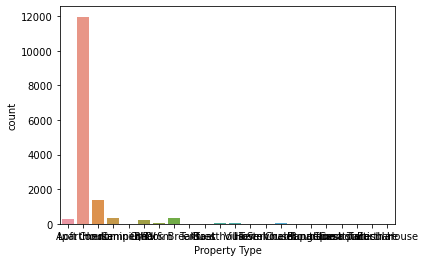

In [815]:
sns.countplot(x='Property Type', data=full_df)

<AxesSubplot:title={'center':'Price'}, xlabel='Cancellation Policy'>

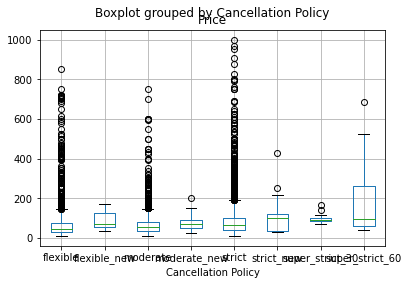

In [816]:

full_df.boxplot(by='Cancellation Policy', column='Price')

In [817]:
pd.DataFrame(full_df.groupby('Smart Location')["Price"].mean().sort_values(ascending=False))

,Price
Smart Location,
"Malibu, CA",999.0
"Son Vida, Spain",950.0
"Frederiksberg C, Denmark",907.0
Hong Kong,860.5
"Andratx, Spain",700.0
...,...
"Madri, Spain",20.0
"San Fernando de Henares, Spain",20.0
"Motilla del Palancar, Spain",14.5


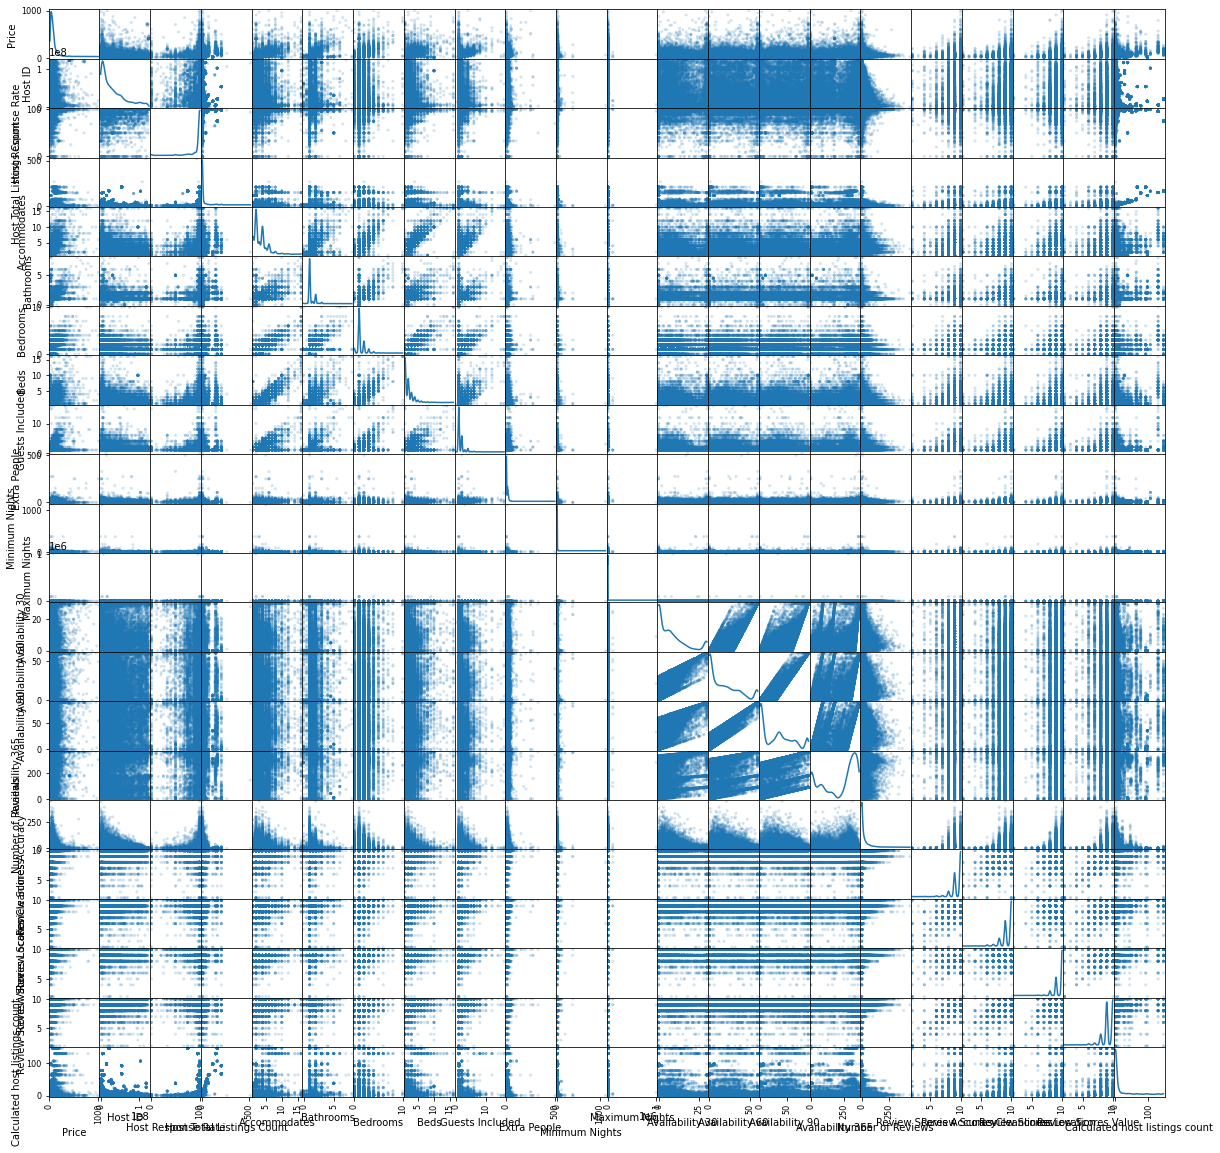

In [818]:
pd.plotting.scatter_matrix(full_df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Definitivamente estos datos están muy desbalanceados 

-------------------------------------------------------------------------------------------------------------
# Ahora, para continuar con nuestro análisis exploratorio, dividiremos nuesto dataset en Training y Test
-------------------------------------------------------------------------------------------------------------

In [822]:
from sklearn.model_selection import train_test_split

#full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
# nuestro set de test, tendrá un 20% de los datos.
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

 
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
print('Columnas Train: ', len(train.columns))
print('Filas  Train  : ', len(train.index))
print("------------------------------")
print('Columnas Test: ', len(test.columns))
print('Filas  Test  : ', len(test.index))

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Columnas Train:  29
Filas  Train  :  11824
------------------------------
Columnas Test:  29
Filas  Test  :  2956


In [823]:
df_train

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,2.0,Jerónimos,Retiro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,2,1125,9,32,52,117,12,9.0,10.0,10.0,9.0,moderate,2.0
1,50.0,85301317,100.0,1.0,Sol,Centro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,1,1125,15,39,64,208,20,9.0,9.0,10.0,10.0,flexible,1.0
2,10.0,84213235,100.0,16.0,Vista Alegre,Carabanchel,"Madrid, Spain",Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,moderate,16.0
3,30.0,15258781,100.0,114.0,Embajadores,Centro,"Madrid, Spain",Apartment,Private room,2,3.0,1.0,1.0,Real Bed,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,strict,97.0
4,32.0,1706029,100.0,2.0,Gaztambide,Chamberí,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,10,1,1125,7,34,62,337,97,9.0,9.0,9.0,9.0,strict,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,1.0,Argüelles,Moncloa - Aravaca,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,1,0,3,1125,2,9,14,193,0,NaN,NaN,NaN,NaN,moderate,1.0
11820,55.0,30659838,100.0,2.0,Aluche,Latina,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,5,20,1,1125,5,29,49,310,68,9.0,9.0,9.0,9.0,strict,1.0
11821,69.0,66354333,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,2,40,1,1125,10,22,23,23,24,10.0,9.0,10.0,10.0,strict,1.0
11822,69.0,77960515,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,15,14,31,48,139,19,10.0,10.0,10.0,10.0,strict,1.0


In [824]:
df_train.info(verbose=True,null_counts=True) +fo(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           11809 non-null  float64
 1   Host ID                         11824 non-null  int64  
 2   Host Response Rate              10317 non-null  float64
 3   Host Total Listings Count       11821 non-null  float64
 4   Neighbourhood Cleansed          11824 non-null  object 
 5   Neighbourhood Group Cleansed    11006 non-null  object 
 6   Smart Location                  11824 non-null  object 
 7   Property Type                   11824 non-null  object 
 8   Room Type                       11824 non-null  object 
 9   Accommodates                    11824 non-null  int64  
 10  Bathrooms                       11780 non-null  float64
 11  Bedrooms                        11804 non-null  float64
 12  Beds                            

NameError: name 'fo' is not defined

****************************************************************************************************************
# TRANSFORMACIONES
****************************************************************************************************************

# Imputaremos los valores asuentes 

Imputamos valores ausentes con 0

In [825]:
cuantitativas=['Host Response Rate','Price','Review Scores Accuracy','Beds','Host Total Listings Count',"Bathrooms",'Bedrooms',"Review Scores Cleanliness","Review Scores Location","Review Scores Value","Calculated host listings count"]
for i in cuantitativas:
      i=df_train[i].fillna(df_train[i].mode()[0], inplace=True)

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='most_frequent')
mode = simple.fit_transform(df_train)

In [826]:
df_train

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,2.0,Jerónimos,Retiro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,2,1125,9,32,52,117,12,9.0,10.0,10.0,9.0,moderate,2.0
1,50.0,85301317,100.0,1.0,Sol,Centro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,1,1125,15,39,64,208,20,9.0,9.0,10.0,10.0,flexible,1.0
2,10.0,84213235,100.0,16.0,Vista Alegre,Carabanchel,"Madrid, Spain",Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,1,0,3,30,14,44,74,140,0,10.0,10.0,10.0,10.0,moderate,16.0
3,30.0,15258781,100.0,114.0,Embajadores,Centro,"Madrid, Spain",Apartment,Private room,2,3.0,1.0,1.0,Real Bed,1,0,10,1125,0,6,36,311,0,10.0,10.0,10.0,10.0,strict,97.0
4,32.0,1706029,100.0,2.0,Gaztambide,Chamberí,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,10,1,1125,7,34,62,337,97,9.0,9.0,9.0,9.0,strict,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,1.0,Argüelles,Moncloa - Aravaca,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,1,0,3,1125,2,9,14,193,0,10.0,10.0,10.0,10.0,moderate,1.0
11820,55.0,30659838,100.0,2.0,Aluche,Latina,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,5,20,1,1125,5,29,49,310,68,9.0,9.0,9.0,9.0,strict,1.0
11821,69.0,66354333,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,2,40,1,1125,10,22,23,23,24,10.0,9.0,10.0,10.0,strict,1.0
11822,69.0,77960515,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,15,14,31,48,139,19,10.0,10.0,10.0,10.0,strict,1.0


In [827]:
cuanlitativas=["Neighbourhood Cleansed", "Neighbourhood Group Cleansed"]
for i in cuanlitativas:
    i=df_train[i].fillna(df_train[i].mode()[0], inplace=True)


In [828]:
df_train.info(verbose=True,null_counts=True) +fo(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           11824 non-null  float64
 1   Host ID                         11824 non-null  int64  
 2   Host Response Rate              11824 non-null  float64
 3   Host Total Listings Count       11824 non-null  float64
 4   Neighbourhood Cleansed          11824 non-null  object 
 5   Neighbourhood Group Cleansed    11824 non-null  object 
 6   Smart Location                  11824 non-null  object 
 7   Property Type                   11824 non-null  object 
 8   Room Type                       11824 non-null  object 
 9   Accommodates                    11824 non-null  int64  
 10  Bathrooms                       11824 non-null  float64
 11  Bedrooms                        11824 non-null  float64
 12  Beds                            

NameError: name 'fo' is not defined


df_train["Neighbourhood Group Cleansed"].fillna(df_train["Neighbourhood Group Cleansed"].mode()[0], inplace=True)
df_train["Bathrooms"].fillna(df_train["Bathrooms"].mode()[0], inplace=True)
df_train["Neighbourhood Group Cleansed"].fillna(df_train["Neighbourhood Group Cleansed"].mode()[0], inplace=True)
df_train["Review Scores Cleanliness"].fillna(df_train["Review Scores Cleanliness"].mode()[0], inplace=True)
df_train["Review Scores Checkin"].fillna(df_train["Review Scores Checkin"].mode()[0], inplace=True)
df_train["Review Scores Communication"].fillna(df_train["Review Scores Checkin"].mode()[0], inplace=True)
df_train["Review Scores Location"].fillna(df_train["Review Scores Location"].mode()[0], inplace=True)
df_train["Review Scores Value"].fillna(df_train["Review Scores Value"].mode()[0], inplace=True)
df_train["Calculated host listings count"].fillna(df_train["Calculated host listings count"].mode()[0], inplace=True)
df_train["Host ID"].fillna(df_train["Host ID"].mode()[0], inplace=True)
df_train["Host Response Rate"].fillna(df_train["Host Response Rate"].mode()[0], inplace=True)
df_train["Smart Location"].fillna(df_train["Smart Location"].mode()[0], inplace=True)

df_train["Host Response Rate"].fillna(df_train["Host Response Rate"].mode()[0], inplace=True)
df_train

In [831]:
df_train.describe(include='O').T

,count,unique,top,freq
Neighbourhood Cleansed,11824,444,Embajadores,1482
Neighbourhood Group Cleansed,11824,47,Centro,6251
Smart Location,11824,232,"Madrid, Spain",10561
Property Type,11824,21,Apartment,9598
Room Type,11824,3,Entire home/apt,7191
Bed Type,11824,5,Real Bed,11565
Cancellation Policy,11824,8,strict,4590


In [832]:
print(df_train.isna())

       Price  Host ID  Host Response Rate  Host Total Listings Count  \
0      False    False               False                      False   
1      False    False               False                      False   
2      False    False               False                      False   
3      False    False               False                      False   
4      False    False               False                      False   
...      ...      ...                 ...                        ...   
11819  False    False               False                      False   
11820  False    False               False                      False   
11821  False    False               False                      False   
11822  False    False               False                      False   
11823  False    False               False                      False   

       Neighbourhood Cleansed  Neighbourhood Group Cleansed  Smart Location  \
0                       False                         Fa

In [833]:
df_train["Neighbourhood Cleansed"].isna().sum()

0

# Realizaremos los cortes de las variables númericas 

Con esta función podemos determinar aproximadamente dónde hacer los cortes de las variables númericas y nos servirá como refencia el limite superior

In [834]:
def outliers(dataout):
    median=dataout.median()
    p25 = dataout.quantile(0.25)
    p75 = dataout.quantile(0.75)
    iqr = p75 - p25
    li= p25 -1.5*iqr 
    ls= p75 +1.5*iqr
    lie=p25 -3*iqr 
    lse=p75 +3*iqr
    print("Rango Intercuartilico =",iqr) #Rango Intercuartilico
    print("Limite Inferior =",li)
    print("Limite Superior =",ls)
    print("Limite Inferior Extremo =",lie)
    print("Limite Superior Extremo =",lse)

# Bathrooms
en realidad podríamos hacer corte en 2 o 1 porque allí están concentrados la mayor parte de los valores, pero queremos ser concervadores, dependiendo de los resultados lo modificarémos

In [835]:
df_train= df_train[df_train["Bathrooms"]<3]

In [836]:
df_train["Bathrooms"].value_counts()

1.0    8897
2.0    1832
1.5     434
2.5      98
0.5      56
0.0      53
Name: Bathrooms, dtype: int64

In [837]:
df_train

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,2.0,Jerónimos,Retiro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,2,1125,9,32,52,117,12,9.0,10.0,10.0,9.0,moderate,2.0
1,50.0,85301317,100.0,1.0,Sol,Centro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,1,1125,15,39,64,208,20,9.0,9.0,10.0,10.0,flexible,1.0
2,10.0,84213235,100.0,16.0,Vista Alegre,Carabanchel,"Madrid, Spain",Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,1,0,3,30,14,44,74,140,0,10.0,10.0,10.0,10.0,moderate,16.0
4,32.0,1706029,100.0,2.0,Gaztambide,Chamberí,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,10,1,1125,7,34,62,337,97,9.0,9.0,9.0,9.0,strict,2.0
5,35.0,15604118,100.0,1.0,Embajadores,Centro,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1,0,2,60,21,51,81,356,43,10.0,10.0,10.0,10.0,strict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,1.0,Argüelles,Moncloa - Aravaca,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,1,0,3,1125,2,9,14,193,0,10.0,10.0,10.0,10.0,moderate,1.0
11820,55.0,30659838,100.0,2.0,Aluche,Latina,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,5,20,1,1125,5,29,49,310,68,9.0,9.0,9.0,9.0,strict,1.0
11821,69.0,66354333,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,2,40,1,1125,10,22,23,23,24,10.0,9.0,10.0,10.0,strict,1.0
11822,69.0,77960515,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,15,14,31,48,139,19,10.0,10.0,10.0,10.0,strict,1.0


Text(0.5, 0, 'Bathrooms')

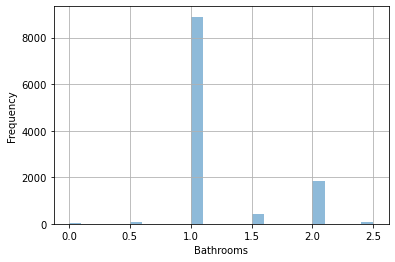

In [838]:
df_train ['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True)

plt.xlabel('Bathrooms')

# Bedrooms
según nuestro análisis

In [839]:
dataout=full_df["Bedrooms"]
outliers(dataout)

Rango Intercuartilico = 1.0
Limite Inferior = -0.5
Limite Superior = 3.5
Limite Inferior Extremo = -2.0
Limite Superior Extremo = 5.0


decidimos hacer el corte en 4

In [840]:
df_train= df_train[df_train["Bedrooms"]<=4]

In [841]:
df_train["Bedrooms"].value_counts()

1.0    7669
2.0    2078
0.0     814
3.0     642
4.0     124
Name: Bedrooms, dtype: int64

<AxesSubplot:xlabel='Bedrooms'>

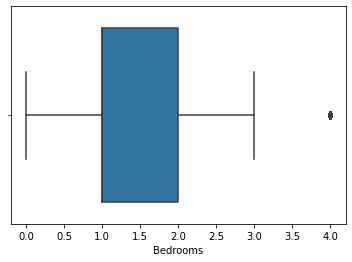

In [842]:
sns.boxplot(x="Bedrooms", data=df_train)

In [843]:
df_train

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,2.0,Jerónimos,Retiro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,2,1125,9,32,52,117,12,9.0,10.0,10.0,9.0,moderate,2.0
1,50.0,85301317,100.0,1.0,Sol,Centro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,1,1125,15,39,64,208,20,9.0,9.0,10.0,10.0,flexible,1.0
2,10.0,84213235,100.0,16.0,Vista Alegre,Carabanchel,"Madrid, Spain",Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,1,0,3,30,14,44,74,140,0,10.0,10.0,10.0,10.0,moderate,16.0
4,32.0,1706029,100.0,2.0,Gaztambide,Chamberí,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,10,1,1125,7,34,62,337,97,9.0,9.0,9.0,9.0,strict,2.0
5,35.0,15604118,100.0,1.0,Embajadores,Centro,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1,0,2,60,21,51,81,356,43,10.0,10.0,10.0,10.0,strict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,1.0,Argüelles,Moncloa - Aravaca,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,1,0,3,1125,2,9,14,193,0,10.0,10.0,10.0,10.0,moderate,1.0
11820,55.0,30659838,100.0,2.0,Aluche,Latina,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,5,20,1,1125,5,29,49,310,68,9.0,9.0,9.0,9.0,strict,1.0
11821,69.0,66354333,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,2,40,1,1125,10,22,23,23,24,10.0,9.0,10.0,10.0,strict,1.0
11822,69.0,77960515,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,15,14,31,48,139,19,10.0,10.0,10.0,10.0,strict,1.0


Tomarémos una decisión arriesgada, identificaresmos los outliers de precio, establecerémos el precio máximo y le haremos un filtro para mejorar los resultados

In [844]:
dataout=df_train['Price']
outliers(dataout)


Rango Intercuartilico = 51.0
Limite Inferior = -42.5
Limite Superior = 161.5
Limite Inferior Extremo = -119.0
Limite Superior Extremo = 238.0


df_train=df_train[df_train['Price']<165]

df_train

<AxesSubplot:xlabel='Price'>

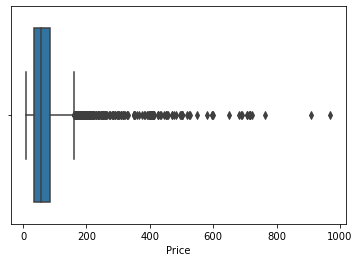

In [845]:
sns.boxplot(x="Price", data=df_train)

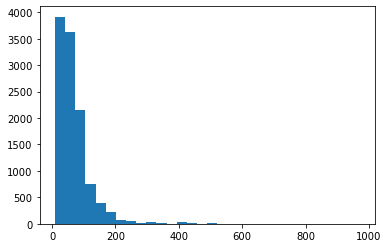

In [846]:
plt.hist(df_train.Price, bins=30)
plt.show()

df_train['logarithm_base2'] = np.log10(df_train['Price']) 


plt.hist(df_train.logarithm_base2, bins=30)
plt.show()

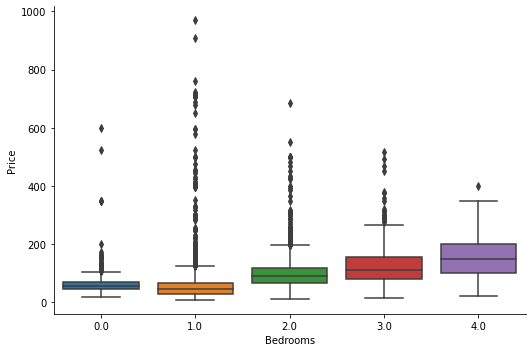

In [847]:
sns.catplot(x ="Bedrooms", y="Price", data = df_train, kind = "box", aspect = 1.5);

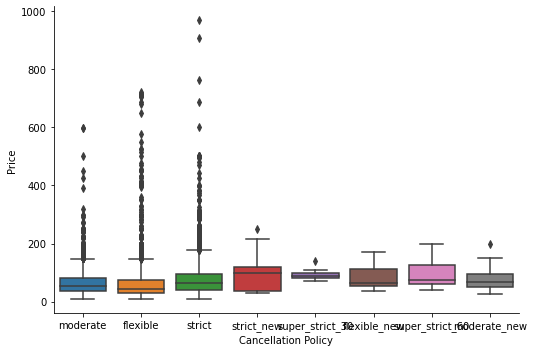

In [848]:
sns.catplot(x ="Cancellation Policy", y="Price", data = df_train, kind = "box", aspect = 1.5);

In [849]:
dataout=df_train["Minimum Nights"]
outliers(dataout)

Rango Intercuartilico = 2.0
Limite Inferior = -2.0
Limite Superior = 6.0
Limite Inferior Extremo = -5.0
Limite Superior Extremo = 9.0


In [850]:
dataout=df_train["Bedrooms"]
outliers(dataout)

Rango Intercuartilico = 1.0
Limite Inferior = -0.5
Limite Superior = 3.5
Limite Inferior Extremo = -2.0
Limite Superior Extremo = 5.0


In [851]:
df_train["Minimum Nights"].value_counts()

2       3921
1       3908
3       1883
4        460
5        423
7        281
10        96
6         93
30        67
15        52
14        31
20        22
12        12
28        10
90         8
60         7
8          7
9          5
21         5
25         4
13         3
120        3
365        3
32         2
26         2
91         2
31         2
17         2
24         1
40         1
360        1
99         1
89         1
170        1
11         1
180        1
27         1
19         1
1125       1
50         1
29         1
Name: Minimum Nights, dtype: int64

In [852]:
dataout=df_train["Minimum Nights"]
outliers(dataout)

Rango Intercuartilico = 2.0
Limite Inferior = -2.0
Limite Superior = 6.0
Limite Inferior Extremo = -5.0
Limite Superior Extremo = 9.0


In [853]:
df_train=df_train[df_train['Minimum Nights']<10]

<AxesSubplot:xlabel='Minimum Nights'>

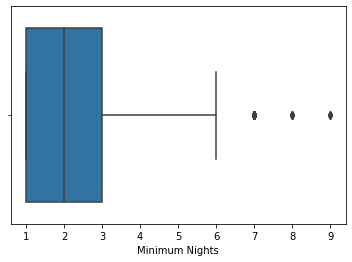

In [854]:
sns.boxplot(x="Minimum Nights", data=df_train)

In [855]:
df_train["Minimum Nights"].value_counts()

2    3921
1    3908
3    1883
4     460
5     423
7     281
6      93
8       7
9       5
Name: Minimum Nights, dtype: int64

In [856]:
df_train

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,2.0,Jerónimos,Retiro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,2,1125,9,32,52,117,12,9.0,10.0,10.0,9.0,moderate,2.0
1,50.0,85301317,100.0,1.0,Sol,Centro,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1,0,1,1125,15,39,64,208,20,9.0,9.0,10.0,10.0,flexible,1.0
2,10.0,84213235,100.0,16.0,Vista Alegre,Carabanchel,"Madrid, Spain",Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,1,0,3,30,14,44,74,140,0,10.0,10.0,10.0,10.0,moderate,16.0
4,32.0,1706029,100.0,2.0,Gaztambide,Chamberí,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,10,1,1125,7,34,62,337,97,9.0,9.0,9.0,9.0,strict,2.0
5,35.0,15604118,100.0,1.0,Embajadores,Centro,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1,0,2,60,21,51,81,356,43,10.0,10.0,10.0,10.0,strict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,1.0,Argüelles,Moncloa - Aravaca,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,1,0,3,1125,2,9,14,193,0,10.0,10.0,10.0,10.0,moderate,1.0
11820,55.0,30659838,100.0,2.0,Aluche,Latina,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,5,20,1,1125,5,29,49,310,68,9.0,9.0,9.0,9.0,strict,1.0
11821,69.0,66354333,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,2,40,1,1125,10,22,23,23,24,10.0,9.0,10.0,10.0,strict,1.0
11822,69.0,77960515,100.0,1.0,Palacio,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,15,14,31,48,139,19,10.0,10.0,10.0,10.0,strict,1.0


# Variables cualitativas, transformación

Es verdad que nuestro dataframe tiene muchas categorías, y a pesar no ser lo más conveniente, he decidido usar label encoder para transformarlas, lo más conveniente sería aplicar el OneHotEncoder(), por temas de desconocimiento y tiempo no lo harémos en este momento.

In [857]:
from sklearn.preprocessing import LabelEncoder

le_cancelation=LabelEncoder()
le_cancelation.fit(df_train["Cancellation Policy"])
df_train["Cancellation Policy"]=le_cancelation.transform(df_train["Cancellation Policy"])


In [858]:
df_train["Cancellation Policy"].value_counts()

4    4041
0    3601
2    3248
5      29
7      17
3      17
6      16
1      12
Name: Cancellation Policy, dtype: int64

In [859]:
df_train["Smart Location"].value_counts()

Madrid, Spain                  9898
Barcelona, Spain                220
London, United Kingdom           96
Paris, France                    81
马德里, Spain                       43
                               ... 
Kimmage, Ireland                  1
Lewisham, Australia               1
Lloret de Vistalegre, Spain       1
Mascot, Australia                 1
Aravaca (Madrid), Spain           1
Name: Smart Location, Length: 193, dtype: int64

In [860]:
le_smart=LabelEncoder()
le_smart.fit(df_train["Smart Location"])
df_train["Smart Location"]=le_smart.transform(df_train["Smart Location"])

In [861]:
df_train["Smart Location"]

0        94
1        94
2        94
4        94
5        94
         ..
11819    94
11820    94
11821    94
11822    94
11823    94
Name: Smart Location, Length: 10981, dtype: int64

In [862]:
le_Cleansed=LabelEncoder()
le_Cleansed.fit(df_train["Neighbourhood Cleansed"])
df_train["Neighbourhood Cleansed"]=le_Cleansed.transform(df_train["Neighbourhood Cleansed"])

In [863]:
le_GroupCleansed=LabelEncoder()
le_GroupCleansed.fit(df_train["Neighbourhood Group Cleansed"])
df_train["Neighbourhood Group Cleansed"]=le_GroupCleansed.transform(df_train["Neighbourhood Group Cleansed"])

In [864]:
le_propertyType=LabelEncoder()
le_propertyType.fit(df_train["Property Type"])
df_train["Property Type"]=le_propertyType.transform(df_train["Property Type"])

In [865]:
le_RoomType=LabelEncoder()
le_RoomType.fit(df_train["Room Type"])
df_train["Room Type"]=le_RoomType.transform(df_train["Room Type"])

In [866]:
le_BedType=LabelEncoder()
le_BedType.fit(df_train["Bed Type"])
df_train["Bed Type"]=le_BedType.transform(df_train["Bed Type"])

In [867]:
df_train

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,2.0,177,33,94,0,0,4,1.0,1.0,2.0,4,1,0,2,1125,9,32,52,117,12,9.0,10.0,10.0,9.0,2,2.0
1,50.0,85301317,100.0,1.0,329,7,94,0,0,4,1.0,1.0,2.0,4,1,0,1,1125,15,39,64,208,20,9.0,9.0,10.0,10.0,0,1.0
2,10.0,84213235,100.0,16.0,372,6,94,0,2,1,1.5,1.0,8.0,4,1,0,3,30,14,44,74,140,0,10.0,10.0,10.0,10.0,2,16.0
4,32.0,1706029,100.0,2.0,139,9,94,0,1,2,1.0,1.0,1.0,4,1,10,1,1125,7,34,62,337,97,9.0,9.0,9.0,9.0,4,2.0
5,35.0,15604118,100.0,1.0,121,7,94,0,1,1,1.0,1.0,1.0,4,1,0,2,60,21,51,81,356,43,10.0,10.0,10.0,10.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,1.0,26,25,94,0,0,3,1.0,2.0,2.0,4,1,0,3,1125,2,9,14,193,0,10.0,10.0,10.0,10.0,2,1.0
11820,55.0,30659838,100.0,2.0,18,20,94,0,0,6,1.0,3.0,3.0,4,5,20,1,1125,5,29,49,310,68,9.0,9.0,9.0,9.0,4,1.0
11821,69.0,66354333,100.0,1.0,248,7,94,0,0,2,1.0,1.0,1.0,4,2,40,1,1125,10,22,23,23,24,10.0,9.0,10.0,10.0,4,1.0
11822,69.0,77960515,100.0,1.0,248,7,94,0,0,2,1.0,1.0,1.0,4,1,0,2,15,14,31,48,139,19,10.0,10.0,10.0,10.0,4,1.0


In [868]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)



,variable_1,variable_2,r,abs_r
571,Availability 60,Availability 90,0.964616,0.964616
599,Availability 90,Availability 60,0.964616,0.964616
541,Availability 30,Availability 60,0.921080,0.921080
569,Availability 60,Availability 30,0.921080,0.921080
815,Calculated host listings count,Host Total Listings Count,0.905164,0.905164
115,Host Total Listings Count,Calculated host listings count,0.905164,0.905164
542,Availability 30,Availability 90,0.851323,0.851323
598,Availability 90,Availability 30,0.851323,0.851323
357,Beds,Accommodates,0.802296,0.802296
273,Accommodates,Beds,0.802296,0.802296


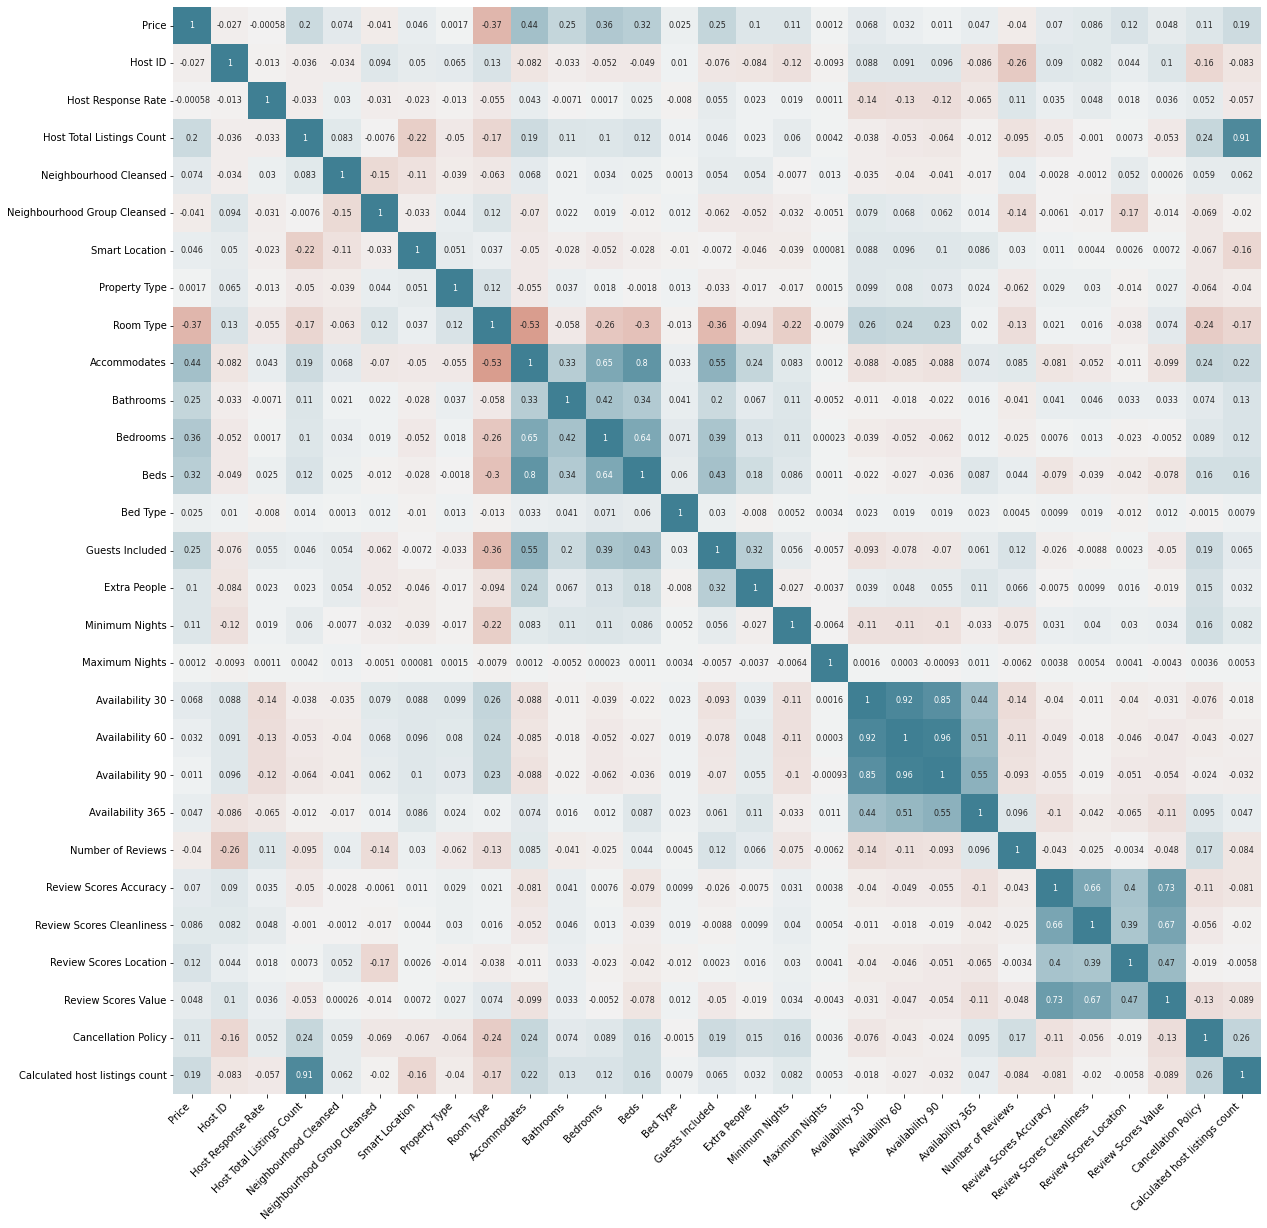

In [869]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Análisis de la matriz de correlación

**Variables altamente correlacionadas.**
availability de 30 con 60 y 90 y viceversa 
obviamente el precio con logaritm_base2 que tiene el precio en logaritmo 
Host total Listing Count con calculated Host listing Count 
Calculated Host listings count con host listing count

In [870]:
df_train= df_train.drop(['Host Total Listings Count', 'Availability 60', 'Availability 90', 'Review Scores Value' ], axis=1)


In [871]:
df_train

,Price,Host ID,Host Response Rate,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Cancellation Policy,Calculated host listings count
0,60.0,31124866,100.0,177,33,94,0,0,4,1.0,1.0,2.0,4,1,0,2,1125,9,117,12,9.0,10.0,10.0,2,2.0
1,50.0,85301317,100.0,329,7,94,0,0,4,1.0,1.0,2.0,4,1,0,1,1125,15,208,20,9.0,9.0,10.0,0,1.0
2,10.0,84213235,100.0,372,6,94,0,2,1,1.5,1.0,8.0,4,1,0,3,30,14,140,0,10.0,10.0,10.0,2,16.0
4,32.0,1706029,100.0,139,9,94,0,1,2,1.0,1.0,1.0,4,1,10,1,1125,7,337,97,9.0,9.0,9.0,4,2.0
5,35.0,15604118,100.0,121,7,94,0,1,1,1.0,1.0,1.0,4,1,0,2,60,21,356,43,10.0,10.0,10.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,52.0,122631275,100.0,26,25,94,0,0,3,1.0,2.0,2.0,4,1,0,3,1125,2,193,0,10.0,10.0,10.0,2,1.0
11820,55.0,30659838,100.0,18,20,94,0,0,6,1.0,3.0,3.0,4,5,20,1,1125,5,310,68,9.0,9.0,9.0,4,1.0
11821,69.0,66354333,100.0,248,7,94,0,0,2,1.0,1.0,1.0,4,2,40,1,1125,10,23,24,10.0,9.0,10.0,4,1.0
11822,69.0,77960515,100.0,248,7,94,0,0,2,1.0,1.0,1.0,4,1,0,2,15,14,139,19,10.0,10.0,10.0,4,1.0


# TRATAMIENTO DEL TEST

CREACIÓN DATAFRAME

In [872]:
df_test= pd.read_csv('./test.csv', sep=';', decimal='.')
print('Columnas Test: ', len(test.columns))
print('Filas  Test  : ', len(test.index))


Columnas Test:  29
Filas  Test  :  2956


IMPUTACIÓN DE MISSING VALUES MODA

In [873]:
cuantitativas=['Host Response Rate','Price','Review Scores Accuracy','Beds','Host Total Listings Count',"Bathrooms",'Bedrooms',"Review Scores Cleanliness","Review Scores Location","Review Scores Value","Calculated host listings count"]
for i in cuantitativas:
      i=df_test[i].fillna(df_test[i].mode()[0], inplace=True)

In [874]:
cuanlitativas=["Neighbourhood Cleansed", "Neighbourhood Group Cleansed"]
for i in cuanlitativas:
    i=df_test[i].fillna(df_test[i].mode()[0], inplace=True)


In [875]:
df_test= df_test[df_test["Bedrooms"]<=4]
df_test=df_test[df_test['Minimum Nights']<10]
df_test= df_test[df_test["Bathrooms"]<3]
df_test

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,15.0,74851220,100.0,1.0,Los Rosales,Villaverde,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1,0,1,1125,7,16,46,46,11,10.0,10.0,9.0,10.0,flexible,1.0
1,25.0,27461213,100.0,3.0,Palacio,Centro,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,1,0,3,1125,0,5,35,310,17,10.0,10.0,10.0,10.0,moderate,3.0
2,45.0,3467555,80.0,1.0,Almagro,Chamberí,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,25,1,1125,6,9,12,120,0,10.0,10.0,10.0,10.0,strict,1.0
3,25.0,34722701,100.0,1.0,Lucero,Latina,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1,0,1,1125,28,58,88,363,1,10.0,10.0,10.0,10.0,moderate,1.0
4,40.0,38327906,100.0,2.0,Embajadores,Centro,"Madrid, Spain",Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,1,0,1,1125,0,0,0,0,0,10.0,10.0,10.0,10.0,flexible,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,23.0,103394490,100.0,3.0,Croydon,Centro,"Londres, United Kingdom",House,Private room,1,1.0,1.0,1.0,Real Bed,1,0,1,1125,30,60,90,180,0,10.0,10.0,10.0,10.0,moderate,3.0
2952,52.0,4112877,100.0,3.0,Embajadores,Centro,"Madrid, Spain",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,30,9,26,53,322,73,10.0,10.0,9.0,10.0,strict,1.0
2953,23.0,58889526,100.0,2.0,Puerta Bonita,Carabanchel,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1,0,2,1125,20,50,80,81,20,10.0,10.0,9.0,10.0,flexible,2.0
2954,104.0,22633689,100.0,1.0,Sol,Centro,"Madrid, Spain",House,Entire home/apt,5,1.5,3.0,3.0,Real Bed,2,20,2,1125,6,18,33,102,21,10.0,10.0,10.0,10.0,strict,1.0


le_cancelation=LabelEncoder()
le_cancelation.fit(df_train["Cancellation Policy"])
df_train["Cancellation Policy"]=le_cancelation.transform(df_train["Cancellation Policy"])# Variables cualitativas, transformación

In [876]:
le_cancelation=LabelEncoder()
le_cancelation.fit(df_test["Cancellation Policy"])
df_test["Cancellation Policy"]=le_cancelation.transform(df_test["Cancellation Policy"])

In [877]:
le_smart=LabelEncoder()
le_smart.fit(df_test["Smart Location"])
df_test["Smart Location"]=le_smart.transform(df_test["Smart Location"])

In [878]:
le_Cleansed=LabelEncoder()
le_Cleansed.fit(df_test["Neighbourhood Cleansed"])
df_test["Neighbourhood Cleansed"]=le_Cleansed.transform(df_test["Neighbourhood Cleansed"])

In [879]:
le_GroupCleansed=LabelEncoder()
le_GroupCleansed.fit(df_test["Neighbourhood Group Cleansed"])
df_test["Neighbourhood Group Cleansed"]=le_GroupCleansed.transform(df_test["Neighbourhood Group Cleansed"])

In [880]:
le_propertyType=LabelEncoder()
le_propertyType.fit(df_test["Property Type"])
df_test["Property Type"]=le_propertyType.transform(df_test["Property Type"])

In [881]:
le_RoomType=LabelEncoder()
le_RoomType.fit(df_test["Room Type"])
df_test["Room Type"]=le_RoomType.transform(df_test["Room Type"])

In [882]:
le_BedType=LabelEncoder()
le_BedType.fit(df_test["Bed Type"])
df_test["Bed Type"]=le_BedType.transform(df_test["Bed Type"])

In [883]:
df_test

,Price,Host ID,Host Response Rate,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,15.0,74851220,100.0,1.0,126,37,44,0,1,1,1.0,1.0,1.0,3,1,0,1,1125,7,16,46,46,11,10.0,10.0,9.0,10.0,0,1.0
1,25.0,27461213,100.0,3.0,150,4,44,0,1,1,1.0,1.0,1.0,2,1,0,3,1125,0,5,35,310,17,10.0,10.0,10.0,10.0,2,3.0
2,45.0,3467555,80.0,1.0,11,6,44,0,0,2,1.0,1.0,1.0,3,1,25,1,1125,6,9,12,120,0,10.0,10.0,10.0,10.0,4,1.0
3,25.0,34722701,100.0,1.0,127,16,44,0,1,1,1.0,1.0,1.0,3,1,0,1,1125,28,58,88,363,1,10.0,10.0,10.0,10.0,2,1.0
4,40.0,38327906,100.0,2.0,78,4,44,0,0,3,1.0,0.0,2.0,3,1,0,1,1125,0,0,0,0,0,10.0,10.0,10.0,10.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,23.0,103394490,100.0,3.0,61,4,39,12,1,1,1.0,1.0,1.0,3,1,0,1,1125,30,60,90,180,0,10.0,10.0,10.0,10.0,2,3.0
2952,52.0,4112877,100.0,3.0,78,4,44,0,0,2,1.0,1.0,1.0,3,1,0,2,30,9,26,53,322,73,10.0,10.0,9.0,10.0,4,1.0
2953,23.0,58889526,100.0,2.0,172,3,44,0,1,1,1.0,1.0,1.0,3,1,0,2,1125,20,50,80,81,20,10.0,10.0,9.0,10.0,0,2.0
2954,104.0,22633689,100.0,1.0,200,4,44,12,0,5,1.5,3.0,3.0,3,2,20,2,1125,6,18,33,102,21,10.0,10.0,10.0,10.0,4,1.0


In [884]:
df_test= df_test.drop(['Host Total Listings Count', 'Availability 60', 'Availability 90', 'Review Scores Value' ], axis=1)

In [885]:
df_test


,Price,Host ID,Host Response Rate,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Location,Cancellation Policy,Calculated host listings count
0,15.0,74851220,100.0,126,37,44,0,1,1,1.0,1.0,1.0,3,1,0,1,1125,7,46,11,10.0,10.0,9.0,0,1.0
1,25.0,27461213,100.0,150,4,44,0,1,1,1.0,1.0,1.0,2,1,0,3,1125,0,310,17,10.0,10.0,10.0,2,3.0
2,45.0,3467555,80.0,11,6,44,0,0,2,1.0,1.0,1.0,3,1,25,1,1125,6,120,0,10.0,10.0,10.0,4,1.0
3,25.0,34722701,100.0,127,16,44,0,1,1,1.0,1.0,1.0,3,1,0,1,1125,28,363,1,10.0,10.0,10.0,2,1.0
4,40.0,38327906,100.0,78,4,44,0,0,3,1.0,0.0,2.0,3,1,0,1,1125,0,0,0,10.0,10.0,10.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,23.0,103394490,100.0,61,4,39,12,1,1,1.0,1.0,1.0,3,1,0,1,1125,30,180,0,10.0,10.0,10.0,2,3.0
2952,52.0,4112877,100.0,78,4,44,0,0,2,1.0,1.0,1.0,3,1,0,2,30,9,322,73,10.0,10.0,9.0,4,1.0
2953,23.0,58889526,100.0,172,3,44,0,1,1,1.0,1.0,1.0,3,1,0,2,1125,20,81,20,10.0,10.0,9.0,0,2.0
2954,104.0,22633689,100.0,200,4,44,12,0,5,1.5,3.0,3.0,3,2,20,2,1125,6,102,21,10.0,10.0,10.0,4,1.0


Ahora cambiamos a array de numpay el dataframe en el x= estarán todas las variables y en el y= estará el precio, también haremos la normalización con los minimos y máximos para ello usamos standardscaler

In [886]:
from sklearn import preprocessing

data = df_train.values
y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto
feature_names = df_train.columns[1:]

print("Datos de entrenamiento, ", X.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X)
XtrainScaled = scaler.transform(X)

Datos de entrenamiento,  (10981, 24)


In [887]:
X.shape

(10981, 24)

In [888]:
df_train.values.shape

(10981, 25)

In [889]:
X.shape

(10981, 24)

In [939]:
# Veamos la importancia de las variables

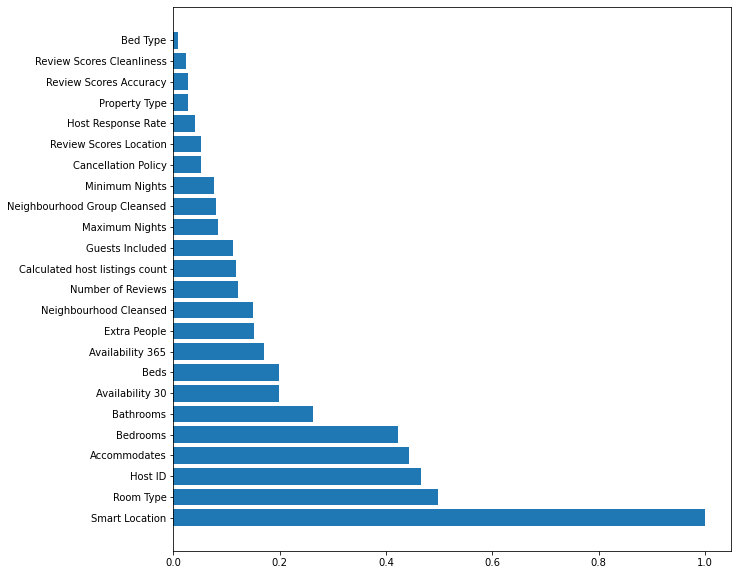

In [940]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

In [ ]:
Vemos que el smart Location hasta Bedrooms tiene gran importancia.

# Probaremos con el arbol de decisión

#  empezamos con la validación cruzada

best mean cross-validation score: 0.131
best parameters: {'max_depth': 9}


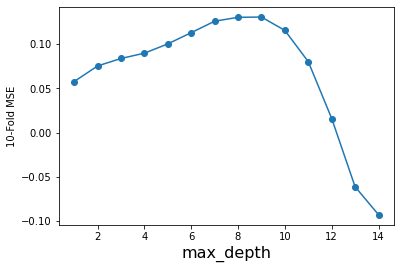

In [898]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

Mi concideración personal: a pesar que nos die que un max optimo de 9 pero pienso que usaré dos o máximo tres 

Una vez hecho el análisis y el procesado en train y test ahora el dataframe lo cambiamos a un array de numpay y esalaremos, ojo aquí no se hace el fit del StandardScaller pues se usa el de train. 

In [895]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]
# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [896]:
# Aplicamos los mejores valores del train y veremos los resultados

In [915]:
maxDepthOptimo = 2# grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y)
print("Train: ",treeModel.score(XtrainScaled,y))
print("Test: ",treeModel.score(XtestScaled,y_test))

Train:  0.3428210782667759
Test:  0.15448572134596317


Despues de probar varios optimos resolvemos que de ser en 2 para mejorar los resultados ya de lo contrario tendríamos una perdida 

# Aplicaremos ahora el modelo de lasso, para ello usaremos de nuevo el gridSearch para buscar el mejor parametro

In [917]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso

tscv = TimeSeriesSplit(n_splits=3)

alpha_vector = np.logspace(-4,4,20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = tscv.split(XtrainScaled)).fit(XtrainScaled, y)

best mean cross-validation score: -0.281
best parameters: {'alpha': 0.03359818286283781}


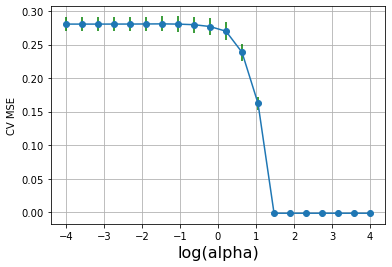

In [918]:
print("best mean cross-validation score: {:.3f}".format(-1*grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [920]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 2.41e+03
MSE Modelo Lasso (test) : 2.72e+03
RMSE Modelo Lasso (train): 49.1
RMSE Modelo Lasso (test) : 52.2


Aquí podemos ver que en test el modlo mejora el resultado y obtenmos una predicción del precio que sería 52.2 €, no obstante podría mejorarse haciendo el log del precio, pero desafortunadamente por tiempo no puedo realizarlo, explico procedimiento, se hace el array de numpay con el log10 del precio y en el resultado se debe tener cuidado de transformar el precio quitarle el logaritmo.

# HAREMOS UN RANDOM FOREST REGRESSOR 

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END .......................................

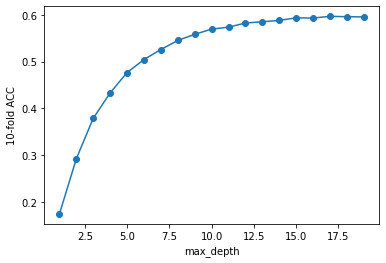

In [921]:
from sklearn.ensemble import RandomForestRegressor
# grid search
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'),
                    param_grid=tuned_parameters,cv=5, verbose=2)
grid.fit(XtrainScaled, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')
plt.show()

In [938]:
maxDepthOptimo = 9#grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y)
print("Train: ",bagModel.score(XtrainScaled,y))
print("Test: ",bagModel.score(XtestScaled,y_test))

Train:  0.7078221572285996
Test:  0.3104609762035254


Con el máximo dado no tengo un buen resultado en test, así que haré que sea menos complejo y usaré 8 mo obstante no mejora mucho los resultados

In [941]:
from sklearn import preprocessing

data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train= data[:,1:]      # nos quedamos con el resto
feature_names = df_train.columns[1:]

print("Datos de entrenamiento, ", X_train.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Datos de entrenamiento,  (10981, 24)


In [942]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]
# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

best mean cross-validation score: -2433.613
best parameters: {'alpha': 1e-05}


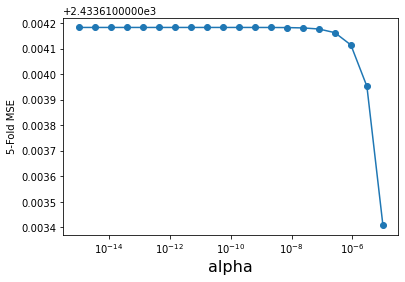

In [943]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-15,-5,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [944]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('CUIDADO!!')
mseTrainModelLasso = mean_squared_error(10**y_train,10**ytrainLasso)
mseTestModelLasso = mean_squared_error(10**y_test,10**ytestLasso)

print('Antitransformada MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('Antitransformada MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('Antitransformada RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('Antitransformada RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.41e+03
MSE Modelo Lasso (test) : 2.73e+03
RMSE Modelo Lasso (train): 49.1
RMSE Modelo Lasso (test) : 52.3
CUIDADO!!


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

------------------------------------------------------------------------------------------------------------------------------------------------
# A CONTINUACIÓN OBSERVARÁ TODAS LAS PRUEBAS Y ERRORES QUE TUVE A LO LARGO DE LA PRÁCTICA Y SOBRE TODO EL INTENTO FALLIDO DE HACER EL EJERCICIO CON EL LOGARITMO DEL PRECIO PARA MEJORAR LOS RESULTADOS
---------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
Durante much tiempo del dia estuve intentando arreglar ese error como puede verlo desde aquí 

Para arregalar el error

In [2026]:
np.all(np.isfinite(df_train)) 

True

In [131]:
df_train.isnull().sum()

level_0                              0
index                                0
Host ID                              0
Host Response Rate                   0
Host Total Listings Count            3
Neighbourhood Cleansed               0
Neighbourhood Group Cleansed         0
Smart Location                       0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                23
Bed Type                             0
Price                                0
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Availability 30                      0
Availability 60                      0
Availability 90                      0
Availability 365                     0
Number of Reviews                    0
Review Scores Accuracy   

In [197]:
df_train["Host Total Listings Count"].fillna(df_train["Host Total Listings Count"].mode()[0], inplace=True)
df_train["Beds"].fillna(df_train["Beds"].mode()[0], inplace=True)
df_train["Review Scores Accuracy"].fillna(df_train["Review Scores Accuracy"].mode()[0], inplace=True)
df_train["Host Total Listings Count"].fillna(df_train["Host Total Listings Count"].mode()[0], inplace=True)

In [198]:
df_train.isnull().sum()

level_0                           0
index                             0
Host ID                           0
Host Response Rate                0
Host Total Listings Count         0
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
Smart Location                    0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin       

# intenté hacer el crossvalidation con el  logaritmo del precio pero me lanzaba este error, abajo está todo lo que intenté hacer para eliminarlo pero no pude

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [208]:
for i in df_train.select_dtypes(include=[object]):
      print(df_train[i].unique())
      

In [211]:
df_train = df_train.astype(float)